>>>>>                                                           CAR PRICE PREDICTION PROJECT.                                                                                                                      

                                                            IMPORTING THE BASIC LIBRARIES AND LOADING THE DATA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\Portfolio Manager\My start\1\PROJECTS\PRICE FOR USED CAR\car_age_price_.csv')
d = data.copy()
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


                                                            EXPLORATORY DATA ANALYSIS/ DATA UNDERSTANDING.

In [3]:
print('-> Data Informations:-')
data.info()
print()
print('-> Data(Observations, Features):-' , data.shape)
print()
print('-> Total Size of the Dataset is:-' , data.size)
print()
print('-> Stat Summary of Data:-' '\n', data.describe())

-> Data Informations:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB

-> Data(Observations, Features):- (112, 2)

-> Total Size of the Dataset is:- 224

-> Stat Summary of Data:-
               Year          Price
count   112.000000     112.000000
mean   2016.669643  483866.044643
std       1.629616   91217.450533
min    2013.000000  300000.000000
25%    2015.000000  423750.000000
50%    2017.000000  500000.000000
75%    2017.000000  550000.000000
max    2020.000000  755000.000000


In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
print('-> Number of Duplicates if any;''\n', data.duplicated().value_counts())
print()
print('-> Number of Unique Values of Data-Points;''\n',data.nunique())
print()
print('-> Number of Missing Values if any ;' '\n', data.isna().sum())
print()
print('-> Data Types;''\n', data.dtypes)

-> Number of Duplicates if any;
 False    58
True     54
dtype: int64

-> Number of Unique Values of Data-Points;
 Year      8
Price    35
dtype: int64

-> Number of Missing Values if any ;
 Year     0
Price    0
dtype: int64

-> Data Types;
 Year     int64
Price    int64
dtype: object


    "INSIGHT 1": Out of 112 datas. there are 54 duplicate values present. Dropping these duplicates reduce the size of dataset, hence it is continued as such.

    --> UNIVARIATE ANALYSIS.

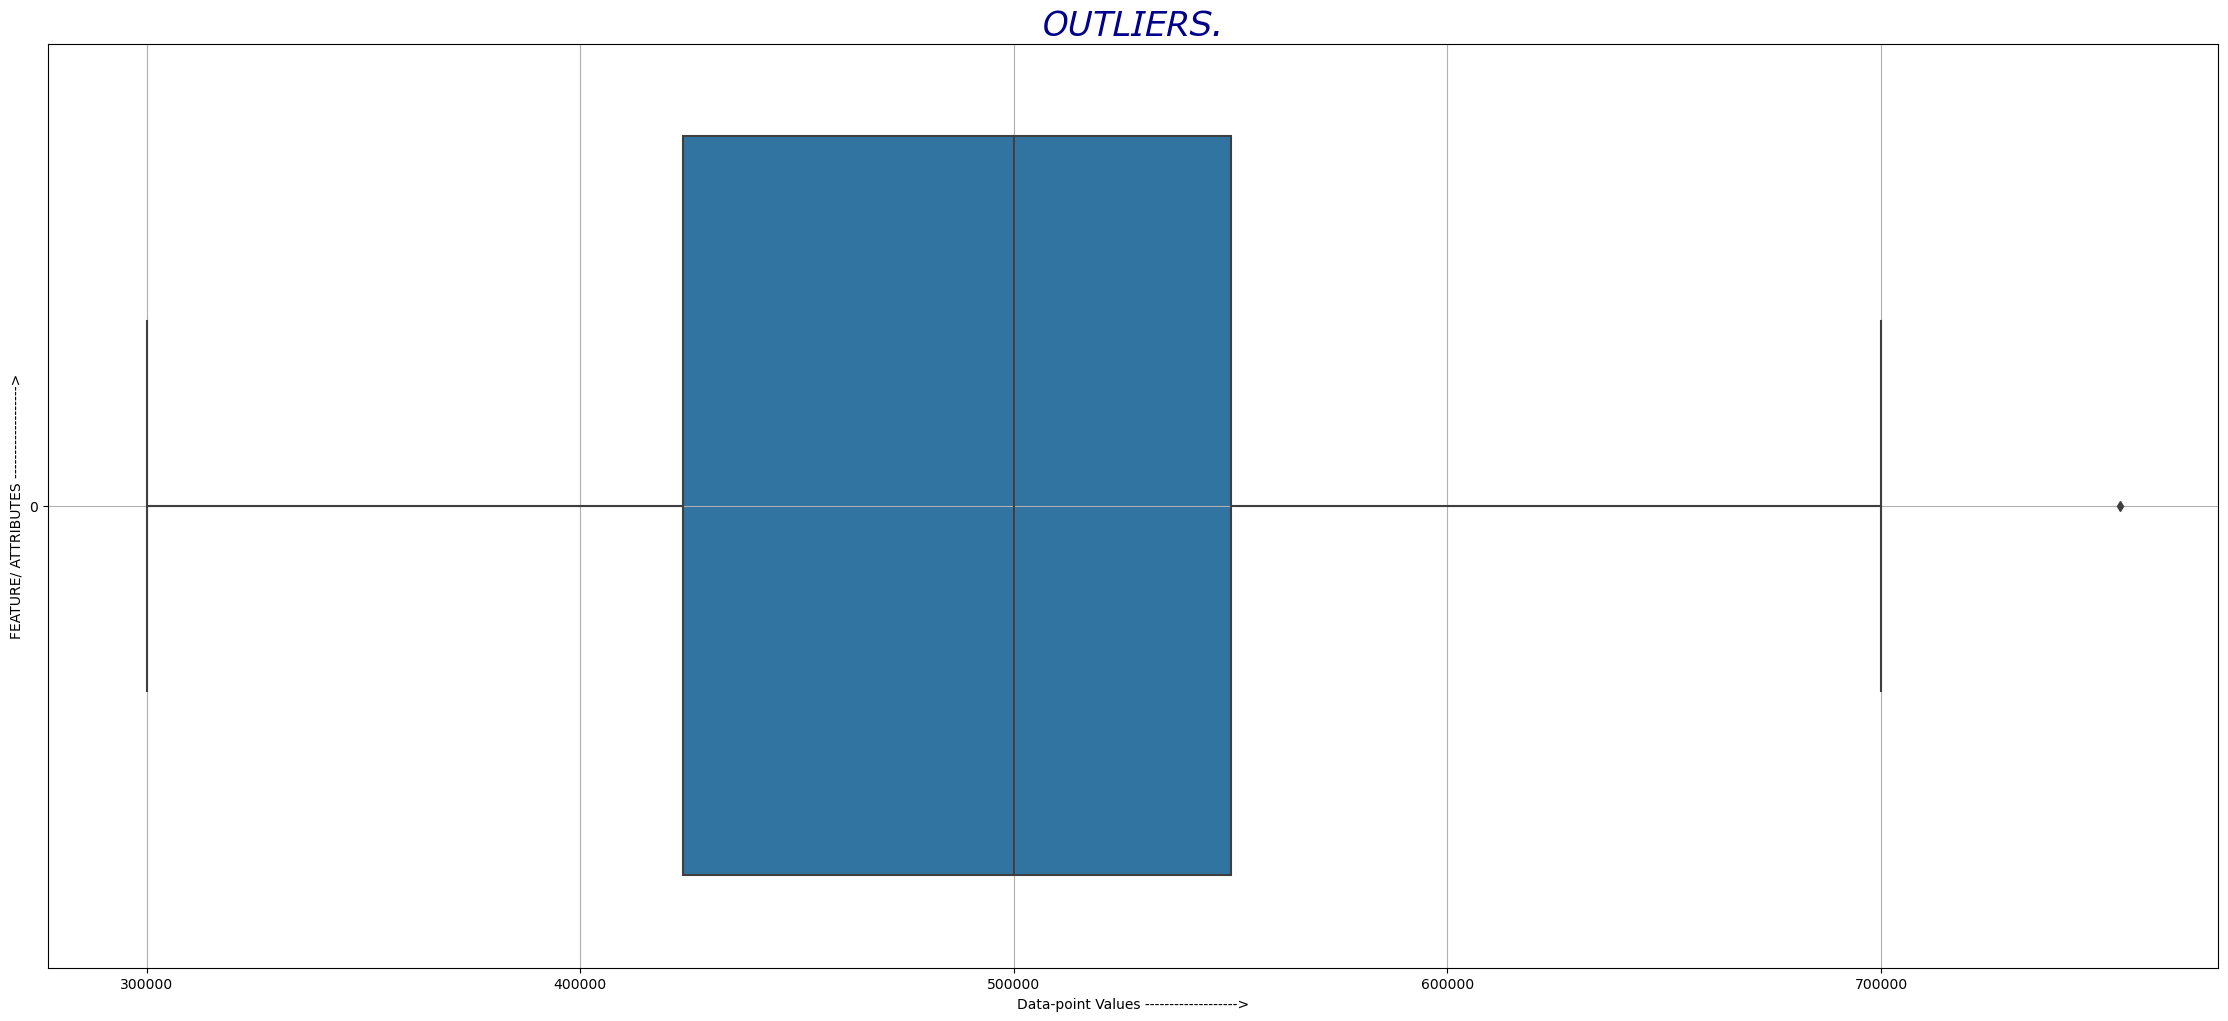

In [6]:
plt.figure(figsize=(28,12))
sns.boxplot(data = data.Price, orient = 'h' )
plt.title('OUTLIERS.', fontdict = {'family': 'Verdana', 'color':  'darkblue', 'style':'italic', 'size':'24'})
plt.xlabel('Data-point Values ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.grid()

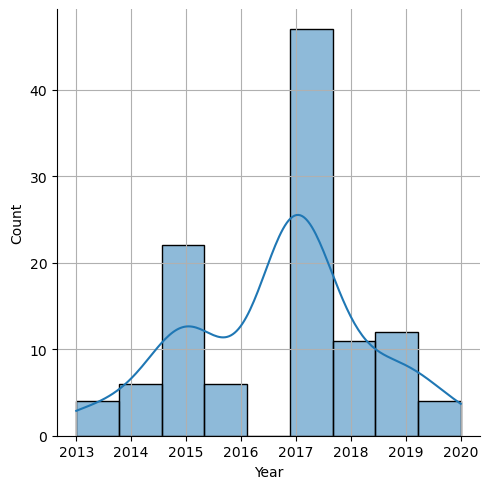

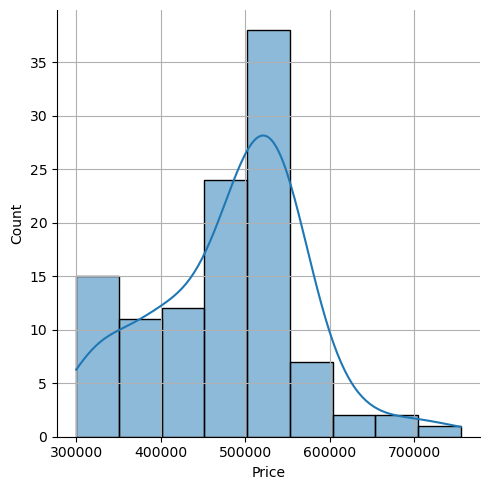

In [7]:
for i in data:
    sns.displot(data = data, x = data[i], kde = True)
    plt.grid()

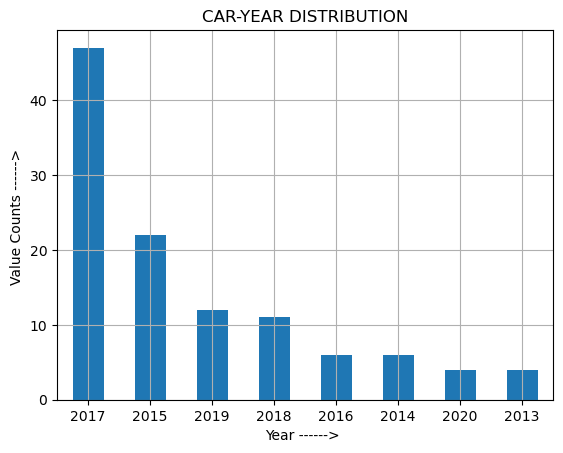

In [8]:
count = data.Year.value_counts()
count.plot(kind = 'bar', rot = 0)
plt.title('CAR-YEAR DISTRIBUTION')
plt.xlabel('Year ------> ')
plt.ylabel('Value Counts ------> ')
plt.grid()

    "INSIGHT 3:" The Car Price Range lies between '3 Lakhs to 8 Lakhs', and 'Over 35 Cars have a price of 5 - 5.5 Lakhs'. Only a few ('below 5 Cars have above 7 Lakhs Cost').

    "INSIGHT 4:" 2017 Model Cars are the most available cars and 2020 & 2013 are available in less numbers (Note: with reference to this particular dataset).

    --> BIVARIATE ANALYSIS.

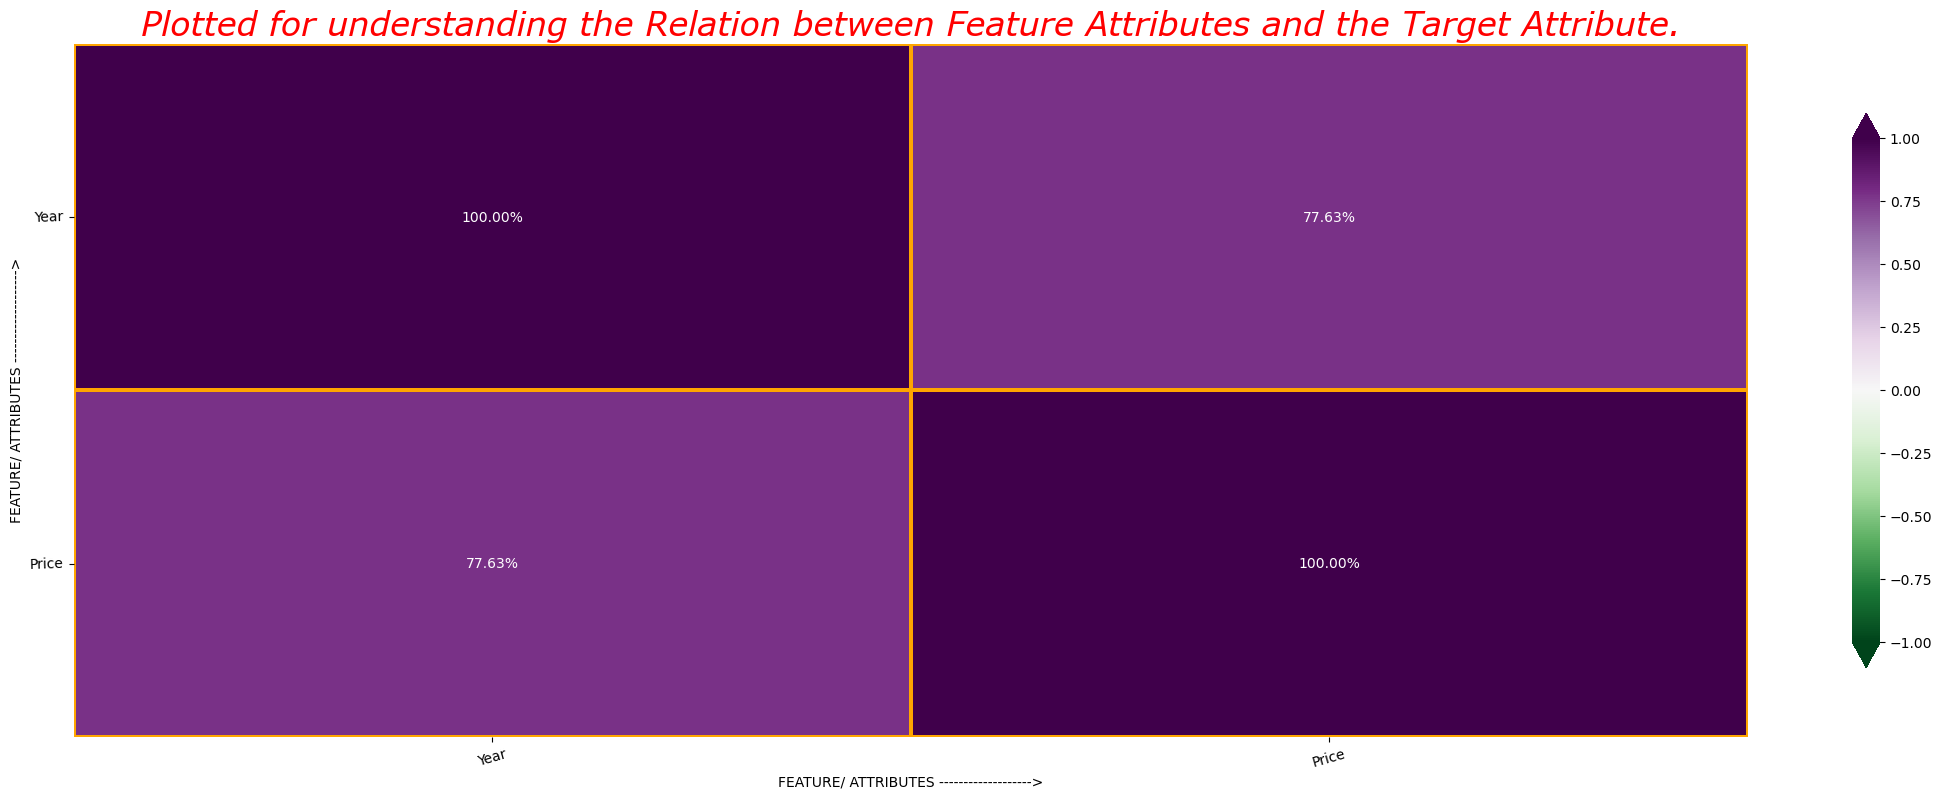

In [9]:
plt.subplots(figsize= (27,9))
sns.heatmap(data.corr(), cbar= True, vmin = -1, linecolor= 'orange', linewidths=1.5, cmap='PRGn_r', annot = True, fmt='.2%', cbar_kws = {"shrink":.8, 'extend':'both'})
plt.title('Plotted for understanding the Relation between Feature Attributes and the Target Attribute.', fontdict = {'family': 'Verdana', 'color':  'red', 'style':'italic', 'size':'24'})
plt.xlabel('FEATURE/ ATTRIBUTES ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.xticks(rotation = 16)
plt.yticks(rotation = 2)
plt.show()

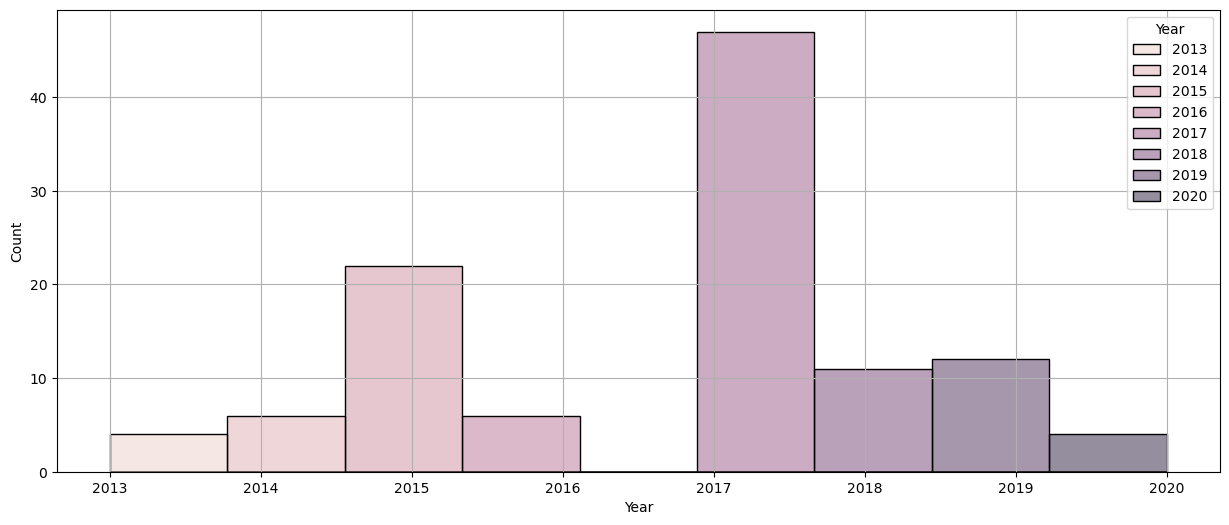

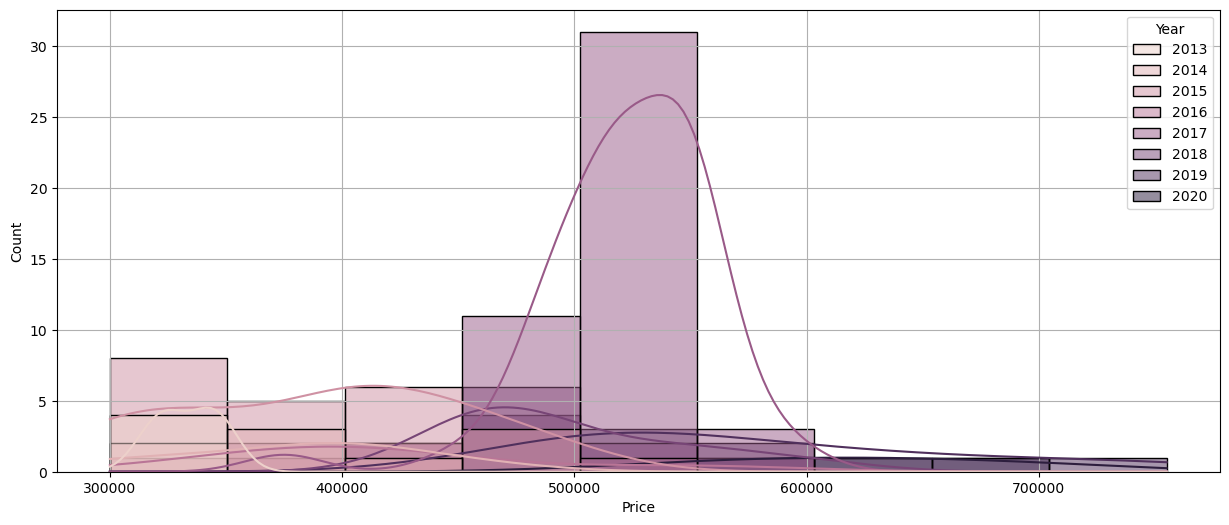

In [10]:
for i in data:
    plt.figure(figsize=(15,6))
    sns.histplot(x = data[i], data = data, kde = True, hue = data.Year)
    plt.grid()

    "INSIGHT 5:" 

    --> OUTLIER MANAGEMENT.

In [11]:
Q1 = np.percentile(data['Price'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Price'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Price'], 75, interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
print('Median of Sepal Width =', data.Price.median())

Q1 =  422500.0
Q2 =  500000.0
Q3 =  550000.0
Median of Sepal Width = 500000.0


In [12]:
IQR = Q3 - Q1
print('IQR =', IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print('The Lower Fence Value is:', low_limit)
print('The Upper Fence Value is:', up_limit)

IQR = 127500.0
The Lower Fence Value is: 231250.0
The Upper Fence Value is: 741250.0


In [13]:
Outliers = []
for o in data['Price']:
    if((o<low_limit) or (o>up_limit)):
        Outliers.append(o)       
print('Those Price Outliers are:', Outliers)

Those Price Outliers are: [755000]


In [14]:
data1 = data.copy()
data1.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


SKEWNESS OF DATA BEFORE LOG TRANSFORMATIONS on every Features: 
 Year    -0.188254
Price   -0.080711
dtype: float64


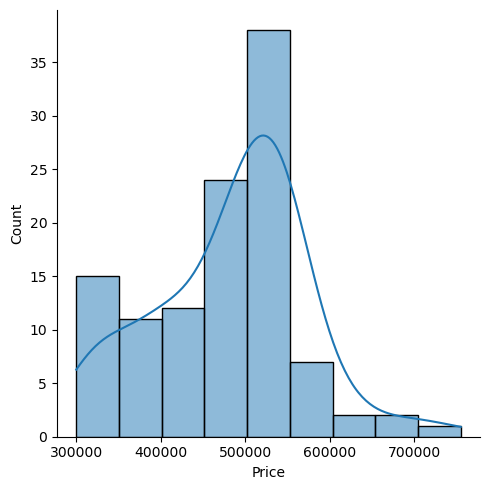

In [15]:
sns.displot(data = data1, x = data1['Price'], kde = True)
print('SKEWNESS OF DATA BEFORE LOG TRANSFORMATIONS on every Features: ''\n', data1.skew())

NOTE 1: Since the Skewness is very less(-0.08), neglecting it does not matter feeding this data to build a predictive model.

    --> SCALING.

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [18]:
no_scale = data1[['Year']]
scale = data1[['Price']]

scaled = MinMaxScaler(feature_range = (0,1)).fit_transform(scale)
scaled_data = pd.DataFrame(scaled, columns = scale.columns)
scaled_data.head()

,Price
0,0.362637
1,1.000000
2,0.879121
3,0.362637
4,0.362637


In [19]:
Data = pd.concat([scaled_data, no_scale], axis = 1)
Data

,Price,Year
0,0.362637,2018
1,1.000000,2019
2,0.879121,2019
3,0.362637,2018
4,0.362637,2018
...,...,...
107,0.164835,2016
108,0.000000,2014
109,0.274725,2015
110,0.263736,2016


                                                                                            MODEL BUILDING.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

Data.columns

Index(['Price', 'Year'], dtype='object')

In [21]:
# Spliting the Data for Training and Testing the Model 

x = data['Year'].values.reshape(-1,1)
y = data['Price'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

> LINEAR REGRESSION ML MODEL.

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model_lr = lin_reg.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print('CONFUSION MATRIX:')
pd.crosstab(y_test, y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

CONFUSION MATRIX:


Predicted,315124.5056723505,410341.641288504,505558.7769046575,553167.3447127342,600775.912520811,648384.4803288877,All
True,,,,,,,
300000,0,1,0,0,0,0,1
320000,1,0,0,0,0,0,1
345000,1,0,0,0,0,0,1
375000,0,0,1,0,0,0,1
390000,0,1,0,0,0,0,1
450000,0,0,0,1,0,0,1
465000,0,1,0,2,0,0,3
495000,0,0,1,0,0,0,1
500000,0,0,1,1,2,0,4


> LOGISTIC REGRESSION ML MODEL.

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=165, random_state = 42)
model_log = log_reg.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)

print('CONFUSION MATRIX:')
pd.crosstab(y_test, y_pred_log, rownames=['True'], colnames=['Predicted'], margins=True)

CONFUSION MATRIX:


Predicted,550000,All
True,,
300000,1,1
320000,1,1
345000,1,1
375000,1,1
390000,1,1
450000,1,1
465000,3,3
495000,1,1
500000,4,4


> LASSO REGRESSION ML MODEL.

In [24]:
from sklearn.linear_model import Lasso

ls_r = Lasso()
model_ls_r = ls_r.fit(X_train,y_train)
y_pred_ls_r = model_ls_r.predict(X_test)

print('CONFUSION MATRIX:')
pd.crosstab(y_test, y_pred_ls_r, rownames=['True'], colnames=['Predicted'], margins=True)

CONFUSION MATRIX:


Predicted,315125.97387593985,410342.28507494926,505558.5962739438,553166.7518734485,600774.9074729383,648383.063072443,All
True,,,,,,,
300000,0,1,0,0,0,0,1
320000,1,0,0,0,0,0,1
345000,1,0,0,0,0,0,1
375000,0,0,1,0,0,0,1
390000,0,1,0,0,0,0,1
450000,0,0,0,1,0,0,1
465000,0,1,0,2,0,0,3
495000,0,0,1,0,0,0,1
500000,0,0,1,1,2,0,4


>>> Finding out which one is performing better; Lasso or Linear or Logistic Regression Model.

In [25]:
from sklearn.metrics import r2_score 

print('R^2 Value for Lasso Regression Model is:- ', r2_score(y_test, y_pred_ls_r))
print('R^2 Value for Linear Regression Model is:- ', r2_score(y_test, y_pred_lr))
print('R^2 Value for Logistic Regression Model is:- ', r2_score(y_test, y_pred_log))


R^2 Value for Lasso Regression Model is:-  0.3675999284778302
R^2 Value for Linear Regression Model is:-  0.36759313425902185
R^2 Value for Logistic Regression Model is:-  -0.7028858374316187


>>> Find the best linear relationship between year and price.

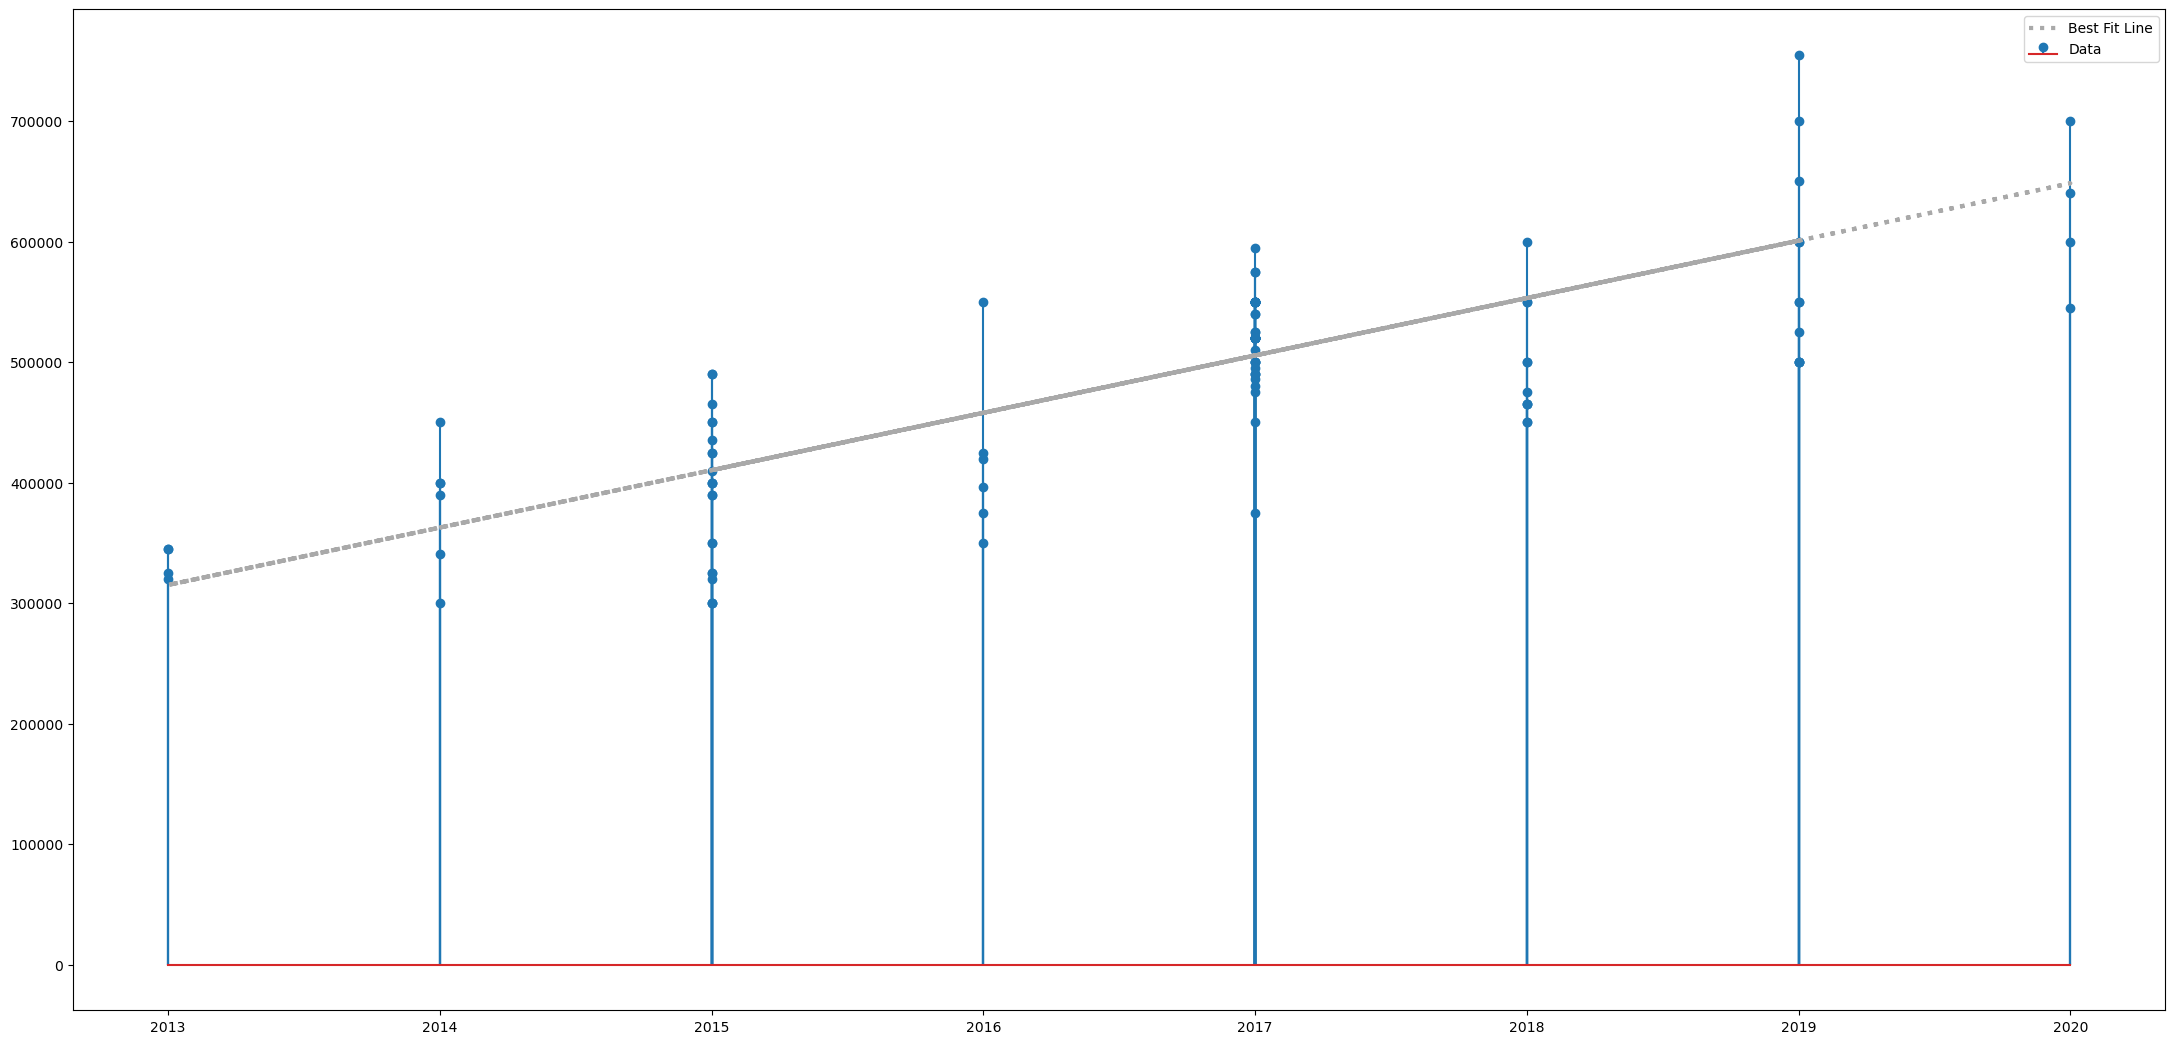

In [26]:
plt.subplots(figsize= (27,13))
plt.stem(x, y, label='Data')
plt.plot(X_test, y_pred_lr, color = 'darkgrey', linestyle ='dotted', linewidth = '3', label = 'Best Fit Line')
plt.legend()
plt.show()

In [27]:
print('Linear Regression Coefficient', lin_reg.coef_)
print('Linear Regression Intercept', lin_reg.intercept_)
best_fit_line_lin_reg = "y = " + str(lin_reg.coef_) + " x + " + str(lin_reg.intercept_)
print("Best Fit Line Equation:- ", best_fit_line_lin_reg)

Linear Regression Coefficient [47608.56780808]
Linear Regression Intercept -95520922.49198583
Best Fit Line Equation:-  y = [47608.56780808] x + -95520922.49198583


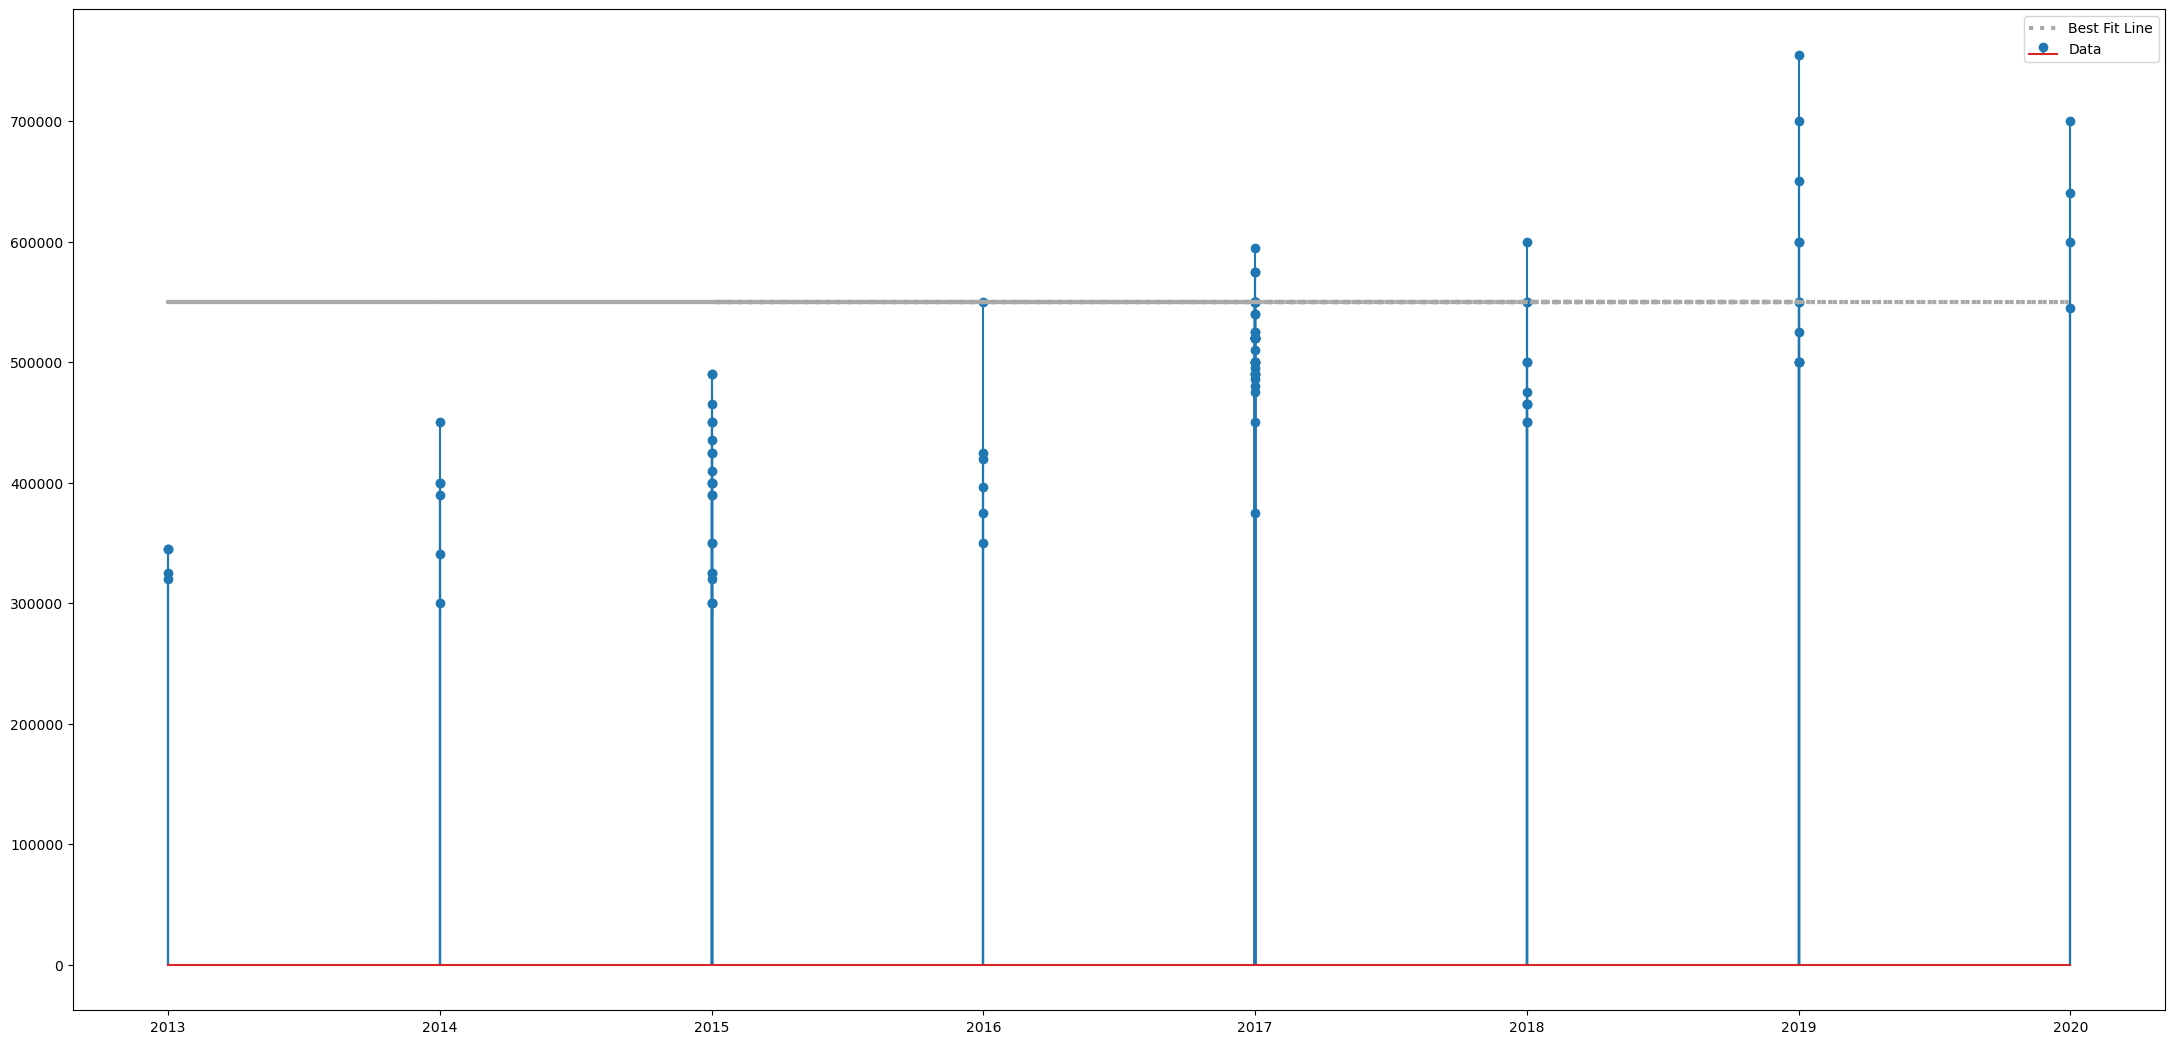

In [28]:
plt.subplots(figsize= (27,13))
plt.stem(x, y, label='Data')
plt.plot(X_test, y_pred_log, color = 'darkgrey', linestyle ='dotted', linewidth = '3', label = 'Best Fit Line')
plt.legend()
plt.show()

In [29]:
print('Logistic Regression Coefficient', log_reg.coef_)
print('Logistic Regression Intercept', log_reg.intercept_)
best_fit_line_log_reg = "y = " + str(log_reg.coef_) + " x + " + str(log_reg.intercept_)
print("Best Fit Line Equation:- ", best_fit_line_log_reg)

Logistic Regression Coefficient [[ 2.21247058e-04]
 [-3.23448010e-04]
 [ 2.21165052e-04]
 [-3.23682502e-04]
 [-3.23917075e-04]
 [ 2.21411030e-04]
 [-3.23213598e-04]
 [ 2.01358600e-05]
 [-3.23213598e-04]
 [ 4.74544831e-04]
 [-3.23448010e-04]
 [-3.23213598e-04]
 [ 2.21411030e-04]
 [-3.23448010e-04]
 [ 4.74840176e-04]
 [-3.22745019e-04]
 [ 2.08774237e-05]
 [-3.22979268e-04]
 [-3.22979268e-04]
 [ 4.74938585e-04]
 [ 5.65753372e-04]
 [-3.22979268e-04]
 [ 8.18861811e-04]
 [ 2.07539099e-05]
 [ 2.07539099e-05]
 [-3.22276763e-04]
 [ 9.85752366e-04]
 [ 2.07539099e-05]
 [-3.22979268e-04]
 [ 3.64973473e-04]
 [-3.22510850e-04]
 [ 2.13711595e-05]
 [-3.22510850e-04]]
Logistic Regression Intercept [ 1.11541192e-07 -1.59894619e-07  1.11821780e-07 -1.59689648e-07
 -1.59484718e-07  1.10979997e-07 -1.60099631e-07  1.13094864e-08
 -1.60099631e-07  2.38475409e-07 -1.59894619e-07 -1.60099631e-07
  1.10979997e-07 -1.59894619e-07  2.36694344e-07 -1.60509773e-07
  9.74969843e-09 -1.60304682e-07 -1.60304682e-07  

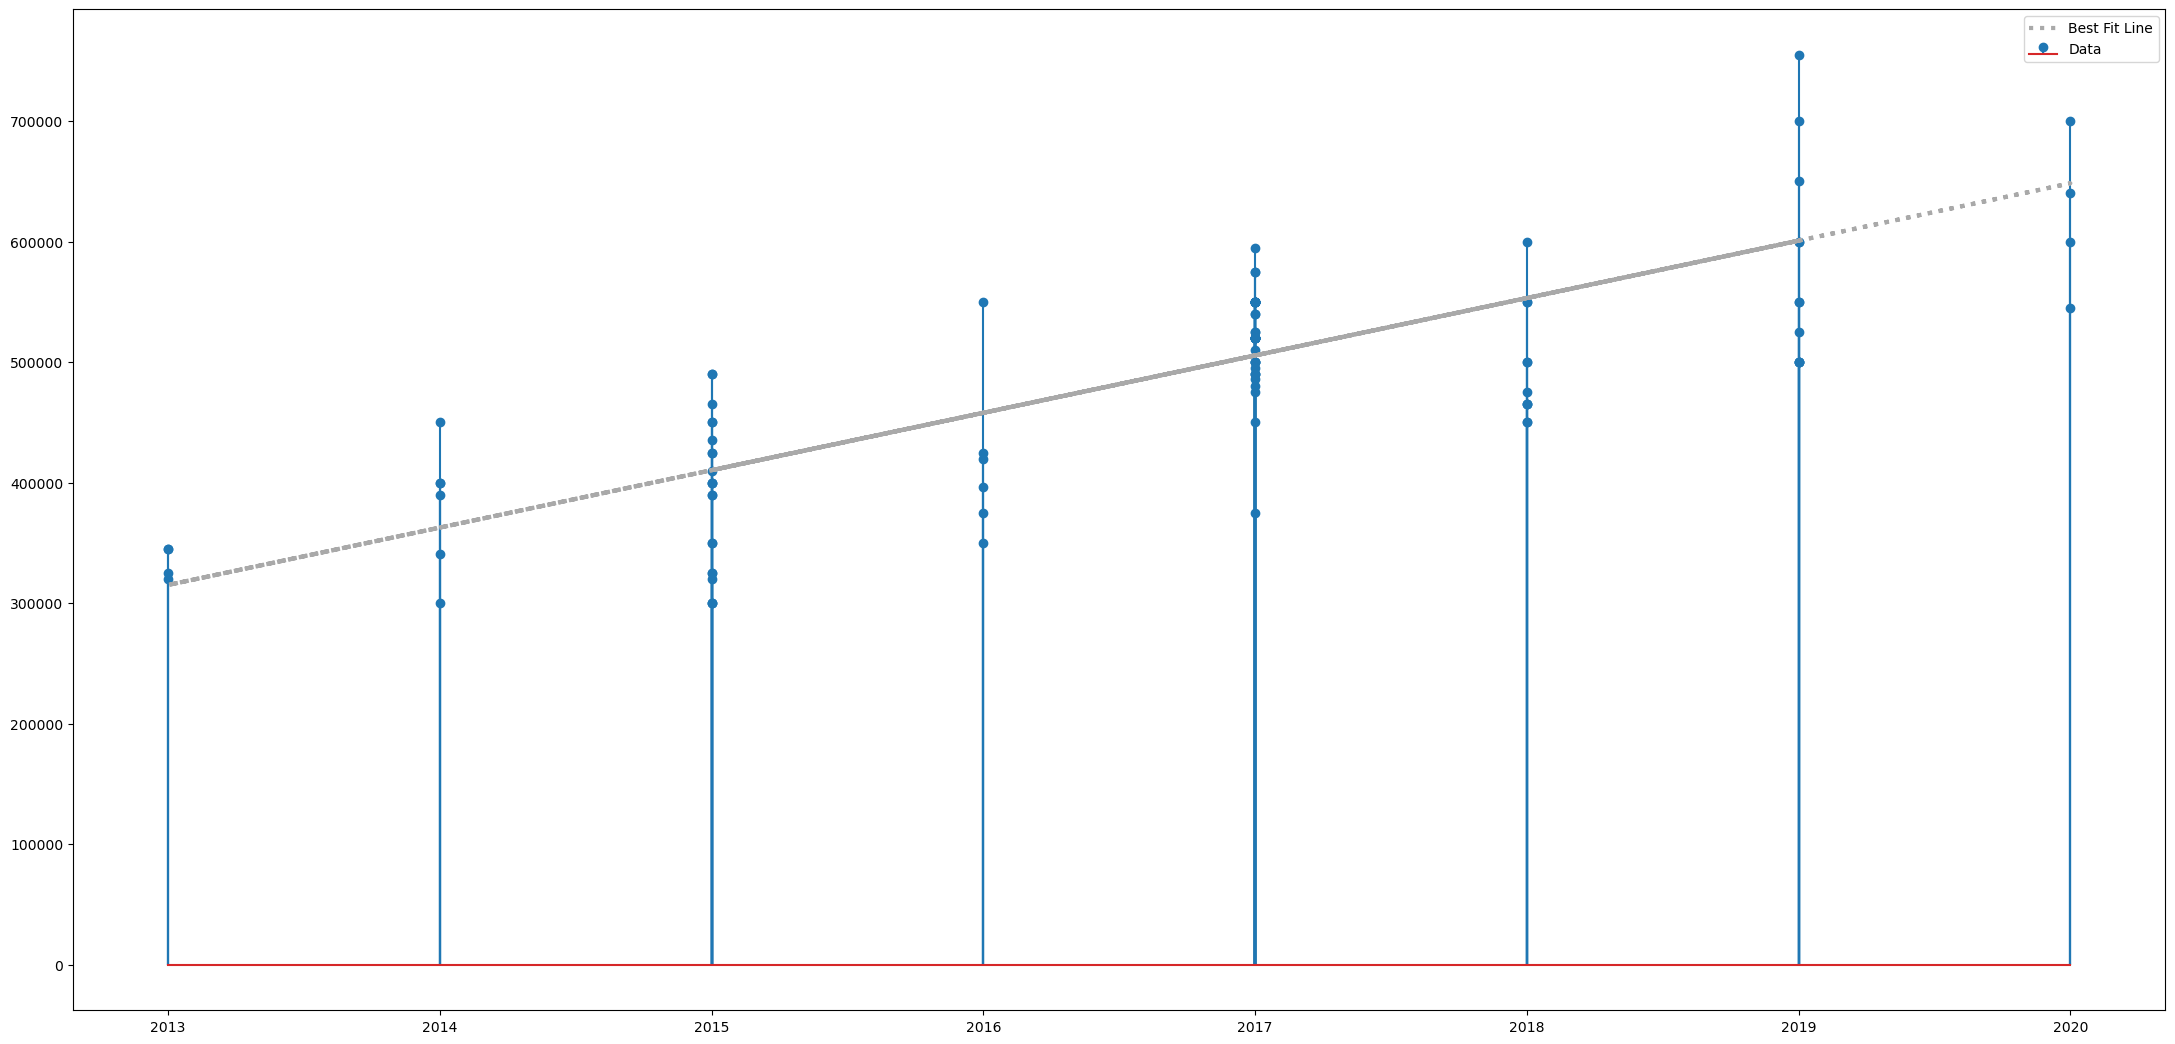

In [30]:
plt.subplots(figsize= (27,13))
plt.stem(x, y, label='Data')
plt.plot(X_test, y_pred_ls_r, color = 'darkgrey', linestyle ='dotted', linewidth = '3', label = 'Best Fit Line')
plt.legend()
plt.show()

In [31]:
print('Lasso Regression Coefficient', ls_r.coef_)
print('Lasso Regression Intercept', ls_r.intercept_)
best_fit_line_ls_r = "y = " + str(ls_r.coef_) + " x + " + str(ls_r.intercept_)
print("Best Fit Line Equation:- ", best_fit_line_ls_r)

Lasso Regression Coefficient [47608.1555995]
Lasso Regression Intercept -95520091.24791838
Best Fit Line Equation:-  y = [47608.1555995] x + -95520091.24791838


* So either the trained Linear Regression Model or the Lasso Regression Model could be used as the Predictive Machine Learning Model in future uses.